# 1.Histogram equalization

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

[[140 149 146 ... 172 176 175]
 [156 144 134 ... 159 161 162]
 [149 145 146 ... 131 133 135]
 ...
 [142 125 135 ... 145 145 145]
 [142 125 135 ... 145 145 145]
 [141 124 135 ... 145 145 145]]


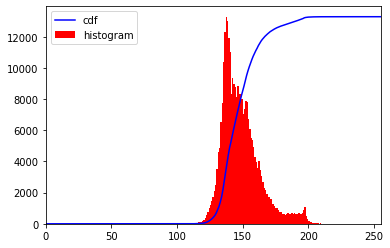

In [2]:
img= cv.imread('mount.jpg',0)

print(img)

hist,bins=np.histogram(img.flatten(),256,[0,255])

cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()

# '''we need a transformation function which maps the input pixels in brighter region to output pixels in full region.That is what histogram equalization does'''

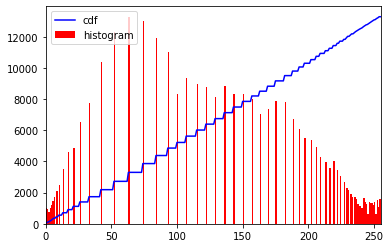

In [3]:
cdf_m=np.ma.masked_equal(cdf,0)
cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf2=np.ma.filled(cdf_m,0).astype('uint8')

img2=cdf2[img]
hist2,bins2=np.histogram(img2.flatten(),256,[0,255])
cdf2=hist2.cumsum()
cdf2_normalized=cdf2*hist2.max()/cdf2.max()
plt.plot(cdf2_normalized,color='b')
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()

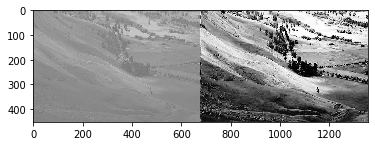

In [4]:

img=cv.imread('mount.jpg',0)
equ=cv.equalizeHist(img)
res=np.hstack((img,equ)) #stacking images side by side
cv.imwrite('res.png',res)
histogram_equalization=cv.imread('res.png')

plt.imshow(histogram_equalization)

# 2.Spatial Linear Filters

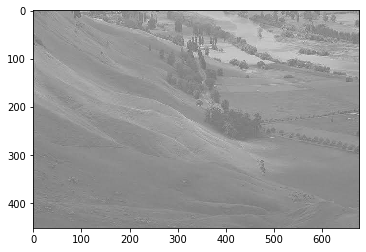

In [5]:
img=cv.imread('mount.jpg',1)
blue = img[100,100]
plt.imshow(img)

In [6]:
print(blue)

[144 144 144]


In [7]:
# accessing RED value
img.item(10,10,2)

149

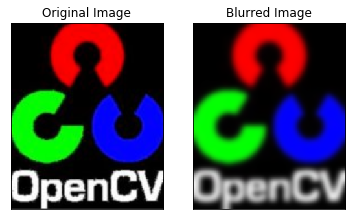

In [8]:
img = cv.imread('opencv_log.png')
#blur = cv.blur(img,(5,5))

blur = cv.GaussianBlur(img,(25,25),0)
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.show()

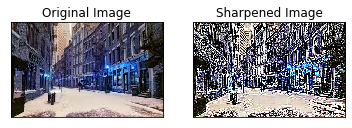

In [9]:
#SHARPEN
import cv2
import numpy as np
# Reading in and displaying our image
image = cv2.imread('snow.jpg')
 

plt.subplot(121),plt.imshow(image),plt.xticks([]),plt.yticks([]),plt.title('Original Image')
#plt.show()

# Create our shapening kernel, it must equal to one eventually
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
sharpen=cv2.filter2D(image,-1,kernel_sharpening)
plt.subplot(122),plt.xticks([]),plt.yticks([]),plt.title('Sharpened Image'),
plt.imshow(sharpen)

# 3.Discrete Cosine Transform (DCT)

Algorithm : Let we are having a 2-D variable named matrix of dimension 8 X 8 which contains image information and a 2-D variable named dct of same dimension which contain the information after applying discrete cosine transform. So, we have the formula
dct[i][j] = ci * cj (sum(k=0 to m-1) sum(l=0 to n-1) matrix[k][l] * cos((2*k+1) *i*pi/2*m) * cos((2*l+1) *j*pi/2*n)
where ci= 1/sqrt(m) if i=0 else ci= sqrt(2)/sqrt(m) and
similarly, cj= 1/sqrt(n) if j=0 else cj= sqrt(2)/sqrt(n)
and we have to apply this formula to all the value, i.e., from i=0 to m-1 and j=0 to n-1

Here, sum(k=0 to m-1) denotes summation of values from k=0 to k=m-1.
In this code, both m and n is equal to 8 and pi is defined as 3.142857

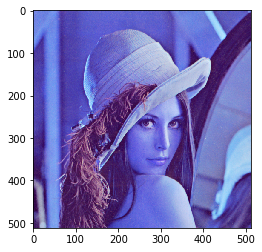

In [34]:
img=cv.imread('Lenna.png')
plt.imshow(img)


In [59]:
input_img=img.flatten()
print(img.shape)

(512, 512, 3)


In [60]:
from math import pi ,cos,sqrt
n=4
cos_matrix=[]
for u in range(n):
    for v in range(n):
        if(u==0):
            cos_matrix.append(1/sqrt(n))
        else:
            neumerator=(2*v+n)*pi*u
            cos_value=neumerator/(2*n)
            value=(2/sqrt(n))*cos(cos_value)
            cos_matrix.append(value)
               
cos_matrix=np.array(cos_matrix)

#increase the value of n in cosine_matrix . reshape input image to 2d from 3d . multiplay 2*2 matrix

In [61]:
n=int(len(input_img)/len(cos_matrix))
print(n)
mod_cos_matrix=np.array([])
for i in range(n):
    #print(i)
    mod_cos_matrix= np.append(mod_cos_matrix,cos_matrix)
print(len(mod_cos_matrix))

49152
786432


In [56]:
output_img=input_img*mod_cos_matrix

convert 1d to 3d or uint8 and show image

In [57]:
final_img=output_img.reshape(512,512,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


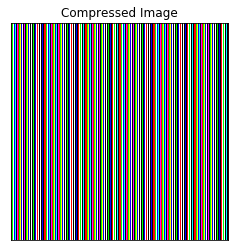

In [58]:
plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.title('Compressed Image')
plt.show()

# 4. Laplacian Distribution

In [62]:
# Declare the variables we are going to use
ddepth = cv.CV_16S
kernel_size = 3
window_name = "Laplace Demo"

In [71]:
# imageName = argv[0] if len(argv) > 0 else 'Lenna.jpg'
src = cv.imread('Lenna.png', cv.IMREAD_COLOR) # Load an image
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

In [72]:
# Apply Laplace function
dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)

In [73]:
# converting back to uint8
abs_dst = cv.convertScaleAbs(dst)

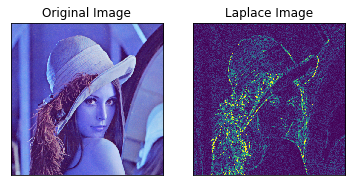

In [80]:
plt.subplot(121),plt.imshow(src),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(abs_dst),plt.title('Laplace Image')
plt.xticks([]), plt.yticks([])
plt.show()

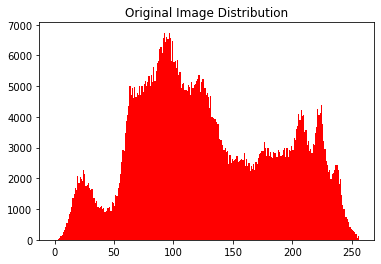

In [89]:
plt.title('Original Image Distribution')
plt.hist(src.flatten(),256,[0,256],color='r')
plt.show()

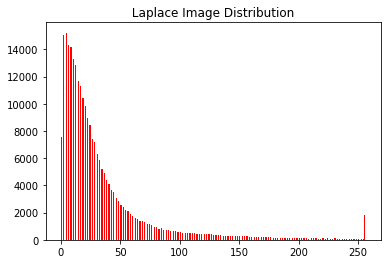

In [90]:
plt.title(' Laplace Image Distribution ')
plt.hist(abs_dst.flatten(),256,[0,256],color='r')
plt.show()